### Analysis of MovieLens Data

We are provided with the MovieLens data collected by the GroupLens Research Project at the University of Minnesota.
In particular, the data was collected through the MovieLens web site (movielens.umn.edu), which records a number of users' ratings (1-5) towards their watched movies. Besides, simple demographic info (e.g., age and gender) for the users and descriptive info (e.g., title and genre) for the movies are provided. 

Originally, there are several separate files to record the user-movie rating info, user demographic info and movie descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'movielens_data.csv'. The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | rating | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __rating__ - the user's rating towards the movie
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may rate multiple movies and a same movie (i.e., a same movieId) may receive ratings from multiple users.

There are four questions to explore with the data as shown below.

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * age/gender/rating is missing
 * occupation is 'none'

__Print the length of the data__ before and after removing the missing data.  

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# import dataset
raw_df = pd.read_csv('files/movielens_data.csv')
raw_df.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,186,39.0,F,executive,302,NaN,Crime,891717742
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
4,166,47.0,NaN,educator,346,1.0,Drama,886397596


In [3]:
# checking dataframe shape
print(raw_df.shape)

(100000, 8)


In [4]:
# checking dataframe info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   userId      100000 non-null  int64  
 1   age         99984 non-null   float64
 2   gender      99983 non-null   object 
 3   occupation  100000 non-null  object 
 4   movieId     100000 non-null  int64  
 5   rating      99984 non-null   float64
 6   genre       100000 non-null  object 
 7   timestamp   100000 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 6.1+ MB


In [5]:
# counting number of null values in each of the column
raw_df.isnull().sum()

userId         0
age           16
gender        17
occupation     0
movieId        0
rating        16
genre          0
timestamp      0
dtype: int64

In [6]:
#STEP 1 of Cleaning: Drop the Null values in dataframe 
clean_df_step1 = raw_df.dropna()

In [7]:
#STEP 2 of Cleaning: creating clean data set by dropping "none" values from the column "occupation"
movielens = clean_df_step1.drop(clean_df_step1.index[(clean_df_step1['occupation'] == 'none')])
movielens.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
5,298,44.0,M,executive,474,4.0,War,884182806
7,253,26.0,F,librarian,465,5.0,Adventure,891628467


In [8]:
# checking the dataframe shape after the data is cleaned 
movielens.shape

(99022, 8)

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique occupations, unique movies, and unique genres
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie 


###### Q2.1 total number of unique users, unique occupations, unique movies, and unique genres

In [9]:
users = movielens['userId'].unique().tolist()
occupations = movielens['occupation'].unique().tolist()
movies = movielens['movieId'].unique().tolist()
genres = movielens['genre'].unique().tolist()
print("No. of users: ", len(users))
print("No. of occupations: ", len(occupations))
print("No. of movies: ", len(movies))
print("No. of genres: ", len(genres))

No. of users:  934
No. of occupations:  20
No. of movies:  1682
No. of genres:  19


##### Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

In [10]:
movielens['rating'].describe()

count    99022.000000
mean         3.527792
std          1.125743
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

##### Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user

In [11]:
#count the total number of movies that each of the users rated
user_group = movielens.groupby(['userId'])['movieId'].count().reset_index(name="total movies rated")
user_group

,userId,total movies rated
0,1,272
1,2,62
2,3,54
3,4,24
4,5,170
...,...,...
929,939,49
930,940,107
931,941,22
932,942,79


In [12]:
user_group['total movies rated'].describe()

count    934.000000
mean     106.019272
std      100.793963
min       19.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      736.000000
Name: total movies rated, dtype: float64

##### Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie

In [13]:
#count the number of each time a movie is rated 
movie_group = movielens.groupby(['movieId'])['rating'].count().reset_index(name="total ratings achived")
movie_group

,movieId,total ratings achived
0,1,445
1,2,129
2,3,88
3,4,206
4,5,84
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


In [14]:
movie_group['total ratings achived'].describe()

count    1682.000000
mean       58.871581
std        79.629796
min         1.000000
25%         6.000000
50%        26.000000
75%        79.000000
max       578.000000
Name: total ratings achived, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/occupation/genre and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

##### Exploration 1: What are the top most-watched genres? Do male users tend to watch movies more than female users?

Types of genre:  19


[Text(0.5, 1.0, 'Number of rating per genre')]

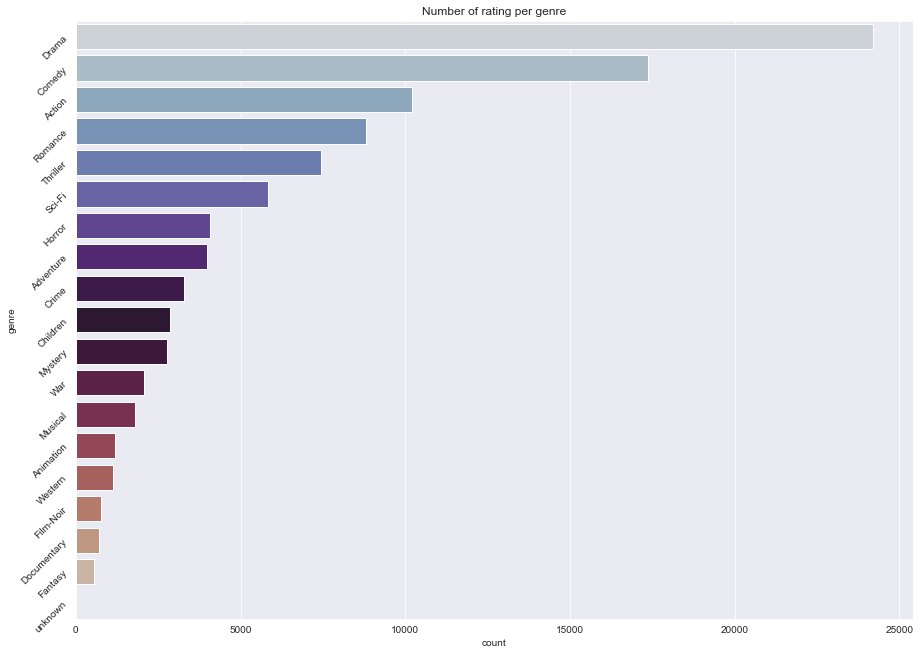

In [15]:
genres = movielens['genre']
print("Types of genre: ", len(set(genres)))

plt.figure(figsize=(15,11))
chart = sns.countplot(y='genre', data=movielens, palette = 'twilight', order = movielens.genre.value_counts().index)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)
chart.set(title = 'Number of rating per genre')

Comment: This graph shows the number of ratings per genre. It is clear that Drama and Comedy dominate the film industry. 

[Text(0.5, 1.0, 'Gender distribution per genre')]

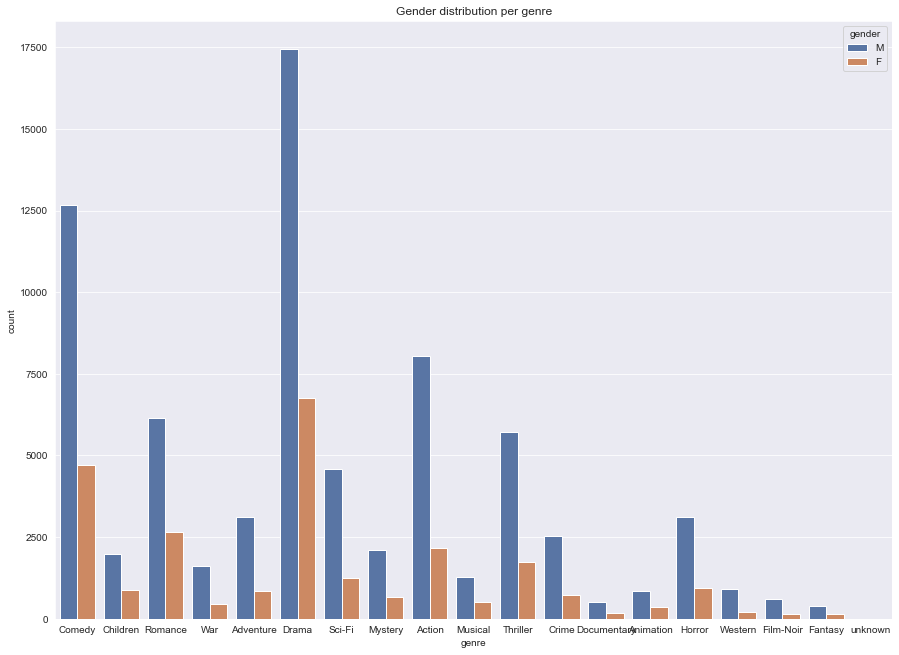

In [16]:
plt.figure(figsize=(15,11))
sns.countplot(x='genre', data = movielens, hue='gender', hue_order=['M','F'], palette = 'deep').set(title = 'Gender distribution per genre')

Comment: For each of the genres, we observe that the number of male users is most likely double the number of female users. 

##### Exploration 2: Which occupations give the most rating?

Types of occupation:  20


[Text(0, 0, 'student'),
 Text(0, 1, 'other'),
 Text(0, 2, 'educator'),
 Text(0, 3, 'engineer'),
 Text(0, 4, 'programmer'),
 Text(0, 5, 'administrator'),
 Text(0, 6, 'writer'),
 Text(0, 7, 'librarian'),
 Text(0, 8, 'technician'),
 Text(0, 9, 'executive'),
 Text(0, 10, 'healthcare'),
 Text(0, 11, 'artist'),
 Text(0, 12, 'entertainment'),
 Text(0, 13, 'scientist'),
 Text(0, 14, 'marketing'),
 Text(0, 15, 'retired'),
 Text(0, 16, 'lawyer'),
 Text(0, 17, 'salesman'),
 Text(0, 18, 'doctor'),
 Text(0, 19, 'homemaker')]

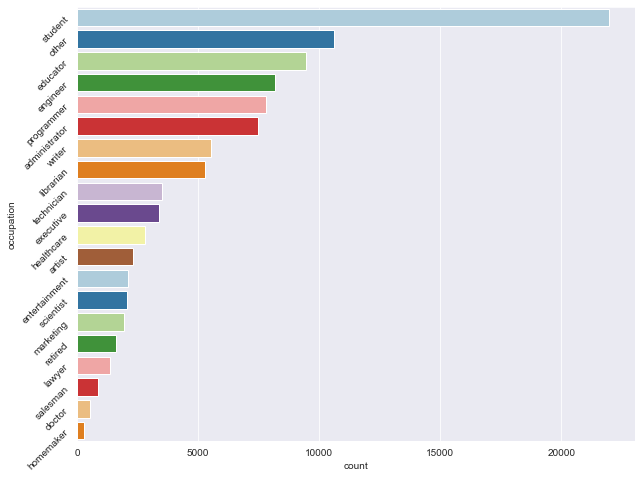

In [17]:
occupations = movielens['occupation']
print("Types of occupation: ", len(set(occupations)))

plt.figure(figsize=(10,8))
chart = sns.countplot(y='occupation', data=movielens, palette = 'Paired',order = movielens.occupation.value_counts().index)
chart.set_yticklabels(chart.get_yticklabels(), rotation=45)

Students tend to provide the most rating since this group of occupation has the a rich source of time, therefore this explains why they dominate the viewers' occupations. 

##### Exploration 3: Which age groups provide ratings the most?

In [18]:
movielens.age.describe()

count    99022.000000
mean        33.042607
std         11.560676
min          7.000000
25%         24.000000
50%         30.000000
75%         40.000000
max         73.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

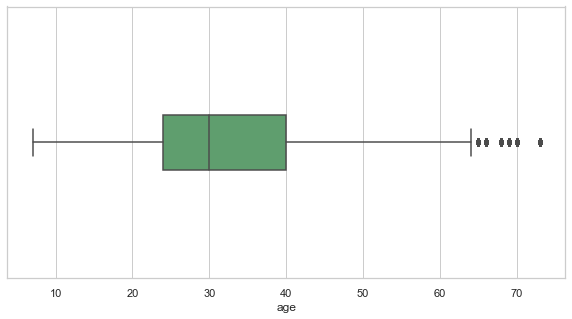

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x='age', data=movielens, orient="h", width = 0.2, color = 'g')

Comment: The boxplot shows the distribution of the users' age. The boxplot is most likely right-skewed, which indicates the users are relatively young with the median age for both of the groups is 30. However, we also observe that the boxplot appears to have some outliers which can affect our observation.

[Text(0.5, 1.0, 'Age - Gender boxplot')]

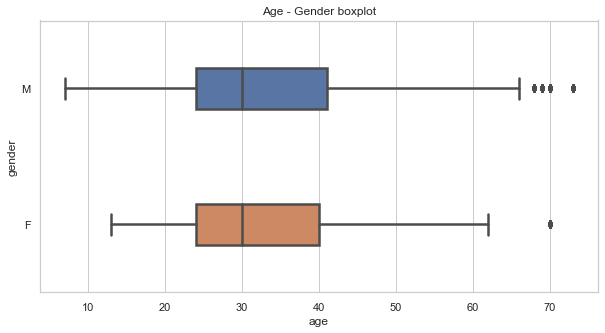

In [20]:
plt.figure(figsize=(10,5))

sns.boxplot(y=movielens.gender, x=movielens.age, width = 0.3, linewidth = 2.5).set(title ='Age - Gender boxplot')

Comment: When compare the age of male and female users, we notice there is no big difference between the two groups. However, the age range of the male users seem to be larger than females'. 

#### Q4. Detect and remove outliers

We may define outlier users and movies with three rules:

* users whose age is no more than 10
* users who rate less than 20 movies
* movies that receives less than 10 ratings (i.e., movies that are rated by less than 10 users)
 
Please remove the corresponding records in the csv file that involves outlier users and movies. After that, __print the length of the data__.

In [21]:
# detect users whose age is no more than 10
age_outliers = movielens['age'] <= 10
len(movielens[age_outliers])

74

In [22]:
# drop users whose age is no more than 10
movielens1 = movielens.drop(movielens.index[(age_outliers)])
len(movielens1)

98948

In [23]:
# detect users who rate less than 20 movies
user_outliers = user_group['total movies rated'] < 20

print(len(user_group[user_outliers].userId))
user_group[user_outliers]

1


,userId,total movies rated
162,166,19


In [24]:
# drop rows that have users who rate less than 20 movies
movielens2 = movielens1.drop(movielens1.index[(movielens1['userId'].isin(user_group[user_outliers].userId))])

In [25]:
len(movielens2)

98929

In [26]:
# detect movies that receive less than 10 ratings
movie_outliers = movie_group['total ratings achived'] < 10
len(movie_group[movie_outliers].movieId)

535

In [27]:
# drop movies that receive less than 10 ratings
movielens_final = movielens1.drop(movielens1.index[(movielens1['movieId'].isin(movie_group[movie_outliers].movieId))])

In [28]:
len(movielens_final)

96873

In [30]:
movielens_final.to_csv('movielens_data_clean.csv', index = False) #save the dataframe